In [1]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
import mkipp
%matplotlib inline

# Core-helium burning

Last time, we studied the evolution of stars through shell hydrogen burning up to the point of core helium ignition. We have seen that the $1\,\mathrm{M}_\odot$ model ignites helium in a core that is dominated by electron degeneracy while the $5\,\mathrm{M}_\odot$ model ignites helium while the core is dominated by ideal gas pressure. Evolving the $1\,\mathrm{M}_\odot$ model through core helium burning takes too much time, so for this lab you should simply download the results below. For the $5\,\mathrm{M}_\odot$ model, you can either start the computation now with the appropriate inlist `inlist_core_he_burning` (do not forget to load this file in the central `inlist`) or download the results (see below).

## Helium flash
In the lectures you already discussed the main difference of these phases. Under 'normal' conditions, stars behave like thermostats: an increase in the burning rate leads to an expansion of the burning region that then reduces the temperature and hence the burning rate. Nuclear burning under such conditions is stable. If electron degeneracy pressure dominates, an increase in the burning rate (e.g. the ignition of helium in the core of the $1\,\mathrm{M}_\odot$ model) still increases the internal energy but does not lead to a larger pressure and hence not to an expansion. Because of the increased internal energy (i.e. also temperature of the non-degenerate ions), the nuclear burning rate increases even more and so on - a thermonuclear runaway is the consequence. Once the pressure of the ions exceeds the electron degeneracy pressure, the degeneracy is said to be lifted and the star behaves again like a thermostat.

As a rule of thumb, stars of initially $\lesssim 2\,\mathrm{M}_\odot$ develop an electron-degenerate core and ignite core helium burning in a thermonuclear runaway called the **helium flash**. Computing stellar models through the helium flash is numerically very difficult. MESA is able to conduct such simulations and we have provided the required `inlist` and starting model such that you can do the computation yourself. Again, this computation requires too many resources to do them live in class, so we have prepared the output of this simulation for you [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/1M_core-helium-burning.tar.gz).

#### Problem 1:
1. To demonstrate that the helium flash is truly a thermonuclear runaway and produces a lot of energy, plot the total luminosity from hydrogen burning (`log_LH`), helium burning (`log_LHe`) and at the surface (`log_L`) of the star as a function of time for the first 2 million years of core helium burning. *Hint:* We found it useful to shift the age of the star (`star_age`) to time zero for plotting; alternatively, you can only adjust the x-limits of the plot.
2. What is the helium core mass at the helium flash, i.e. at which core mass does helium ignite?
3. What is the peak luminosity from helium burning? How does it compare to the total luminosity of all stars in the Milky Way Galaxy? The helium flash in some stars can easily reach luminosities of 1-2 order of magnitudes more than what you find here. Why is most of this helium-burning luminosity not seen at the surface? What happens to all the released energy?
4. What are the hydrogen- and helium-burning luminosities at the end of the computation and how do they compare to the luminosity of the star on the MS?

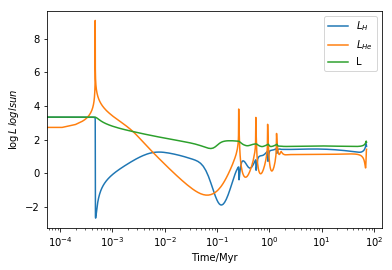

In [2]:
# Your solution here
log_1M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning')
log_LH_1M = log_1M.history.log_LH
log_LHe_1M = log_1M.history.log_LHe
log_L_1M = log_1M.history.log_L

time=(log_1M.history.star_age-log_1M.history.star_age[0])/1e6
plt.plot(time,log_LH_1M,label='$L_H$')
plt.plot(time,log_LHe_1M,label='$L_{He}$')
plt.plot(time,log_L_1M,label='L')
plt.xscale('log')

plt.xlabel('Time/Myr')
plt.ylabel(r'$\log\,L\, log l sun$')
plt.legend()

In [3]:
print('He core mass='%(log_1M.history.he_core_mass[0]))

He core mass=


In the above time sequence you actually note that the main helium flash is followed by several, weaker flashes until the degeneracy is lifted completely and the star continues core helium burning similar to more massive stars.

In fact, neutrino losses from the core (through weak interactions) cool the innermost core regions such that helium is ignited off-center (why do neutrinos cool the core?). Neutrino losses play a major role in late-burning stages of massive stars and we will discuss 
this further in a later lab. If you run the model, you can follow these events quite nicely. Here, a Kippenhahn diagram illustrates the general behaviour.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(27.125,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

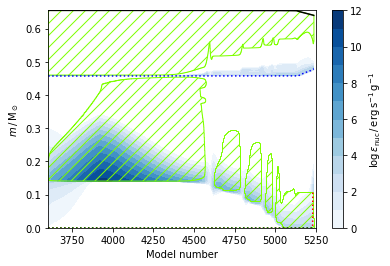

In [4]:
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning'],
                                            decorate_plot = False), xlims=[3600,5250])

# add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

# xy labels
plt.xlabel('Model number')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Problem 2:
1. At which mass coordinate does the main helium flash occur? At which mass coordinates do the other helium flashes occur?
2. What causes the different convective regions in the Kippenhahn diagram?
3. To convince yourself that the electron degeneracy is lifted in the core, make a plot of the central density-temperature plane and indicate the region where degeneracy dominates (either use your result from the student report or the `psi4.data` file from the shell-hydrogen burning lab). Also mark the start and end point of core helium burning.

Text(0,0.5,'log T')

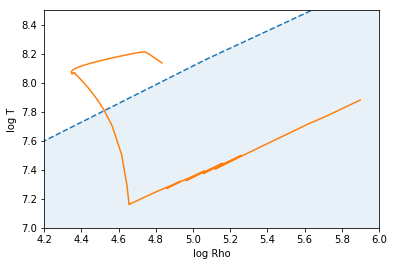

In [5]:
# Your solution here
logRho,logT = np.loadtxt('/Users/gaiafabj/Desktop/stellar_cookbook/09.hydrogen-shell-burning/psi4.data',unpack=True)
plt.plot(logRho,logT,'--')
plt.fill_between(logRho,logT,alpha=0.1)
plt.plot(log_1M.history.log_center_Rho,log_1M.history.log_center_T)
plt.xlim(4.2,6.0)
plt.ylim(7.0,8.5)
plt.xlabel('log Rho')
plt.ylabel('log T')

## Horizontal branch and red clump
Core-helium burning in low mass stars ($\lesssim 2\,\mathrm{M}_\odot$) ignites at a core mass of about $0.45\,\mathrm{M}_\odot$. From the shell-hydrogen-burning lab we know that the luminosity of RGB stars is closely connected to their core mass. Because the helium-burning core expands and there still is the active hydrogen-burning shell, the mirror principle states that the radius and hence luminosity of the star decrease. Still, the luminosity is fixed by the core mass but it is less than that at the tip of the RGB.

Because all stars $\lesssim 2\,\mathrm{M}_\odot$ ignite helium at the same core mass and hence have the same luminosity during core helium burning, they 'clump' at the same position in the HR diagram. The total mass can still vary which can result in a range of effective temperatures. At solar metallicity, there is actually no spread in effective temperatures such that stars undergoing core helium burning are observed in the so-called **red clump** in the HR diagram. At lower metallicity, the effective temperatures are a function of total stellar mass and a **horizontal branch** forms in the HR diagram. The figure below illustrates such a horizontal branch at a metallicity of $Z=10^{-3}$. The numbers along the thick gray line designate the total mass and the gray line itself the beginning of the core helium burning phase. The thin black lines then show how stars evolve further through core helium burning. Observationally, there is a rich horizontal-branch morphology that still holds some unsolved questions. But new attempts are currently made to use the horizontal-branch morphology to assist and improve the age-dating of star clusters and in fact whole galaxies.

<img src="horizontal-branch-maeder.png" alt="Horizontal branch" width="500"/>

## Core-helium burning under non-degenerate conditions
In intermediate-mass stars, core helium is ignited under non-degenerate conditions. We again consider the $5\,\mathrm{M}_\odot$ model and this time you can probably run the simulation yourself as it won't take so much time. Alternatively, you can download the results of the run [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/5M_core-helium-burning.tar.gz) as usual.

To illustrate the evolution in this phase, consider the following HR diagram (the core-helium burning phase is in blue color, the previous evolution from the last lab is the dotted black curve):

Text(0,0.5,'$\\log\\,L/\\mathrm{L}_\\odot$')

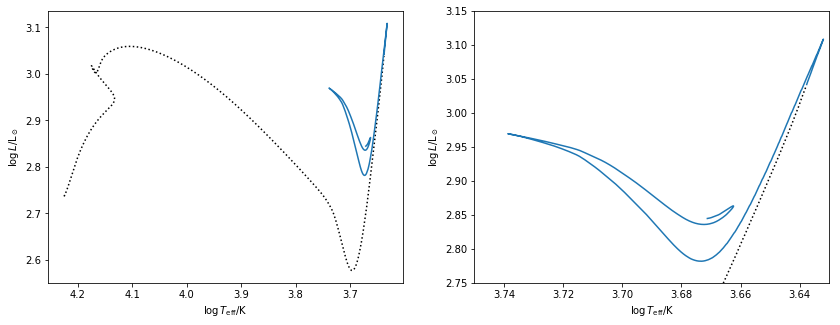

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

log_5M_prev = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition')
log_5M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_core-helium-burning/LOGS_5M_core_he_burning')

# overview
ax1.plot(log_5M_prev.history.log_Teff, log_5M_prev.history.log_L, 'k:')
ax1.plot(log_5M.history.log_Teff, log_5M.history.log_L)

ax1.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
ax1.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$')
ax1.invert_xaxis()

# Zoom-in
ax2.plot(log_5M_prev.history.log_Teff, log_5M_prev.history.log_L, 'k:')
ax2.plot(log_5M.history.log_Teff, log_5M.history.log_L)

ax2.set_xlim(3.75, 3.63)
ax2.set_ylim(2.75, 3.15)

ax2.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
ax2.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$')

You can see that the $5\,\mathrm{M}_\odot$ model first contracts and then goes on a so-called **blue loop**. At the end of core helium burning, the star asymptotically reaches the RGB which is why this following phase is called the **asymptotic giant branch** and we will discuss it in the next lab.

Blue loops are still ill understood and it is not clear which stars may go on a blue loop. There even exists a whole chapter on "To loop or not to loop" in the Kippenhahn and Weigert (and Weiss) book. Some models show blue loops that bring stars almost back to the MS. 

#### Problem 3:
1. Make a Kippenhahn diagram of the model through core helium burning. Plot it as a function of age in the range 79-95 Myr (use the `xaxis = 'star_age'` option). Describe the features that you observe. In particular, where is the helium-burning core, where is the hydrogen-burning shell and why does the envelope become radiative for most of core-helium burning?
2. During core-helium burning the star contracts from the tip of the RGB to then evolve along the blue loop. What causes the contraction?
3. Take the last profile and plot the mass fractions of hydrogen (`h1`), helium (`he4`), carbon (`c12`) and oxygen (`o16`) as a function of mass coordinate. Zoom into the innermost $2\,\mathrm{M}_\odot$ and explain the layered structure of the star. *Hint:* using `log_5M.profile_data().xxx` automatically selects the last available profile.

In [7]:
# Your solution here

#kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning'],
                                            #xaxis='star_age',decorate_plot = False),xlims=[79,95])

# add colorbar and label
#cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)

(0, 2)

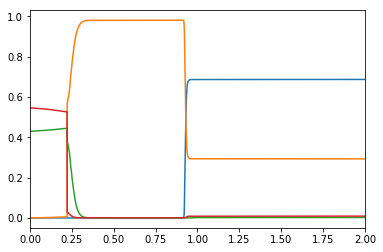

In [8]:
# Your solution here
plt.plot(log_5M.profile_data().mass,log_5M.profile_data().h1)
plt.plot(log_5M.profile_data().mass,log_5M.profile_data().he4)
plt.plot(log_5M.profile_data().mass,log_5M.profile_data().c12)
plt.plot(log_5M.profile_data().mass,log_5M.profile_data().o16)
plt.xlim(0,2)

## Core-helium-burning lifetimes
The core-helium-burning lifetimes are

In [9]:
print('1 Msun: %.1f Myr' % ((log_1M.history.star_age[-1]-log_1M.history.star_age[0])/1e6))
print('5 Msun: %.1f Myr' % ((log_5M.history.star_age[-1]-log_5M.history.star_age[0])/1e6))

1 Msun: 72.2 Myr
5 Msun: 15.5 Myr


The former value is slightly too short because we have stopped the computation before all the helium in the core was gone to save computing time. The true core-helium-burning lifetime is of order 100 Myr. These are much shorter compared to the core hydrogen burning lifetimes of roughly 10 Gyr and 79 Myr for the $1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$ models, respectively.

These lifetimes are essentially given by the available helium fuel and the rate, i.e. luminosity, at which helium is burnt: $\tau\propto M/L$. Be aware that the total stellar luminosity may not be a good proxy for the helium-burning luminosity: for the $1\,\mathrm{M}_\odot$ model, we have seen above that the shell-hydrogen-burning luminosity is slightly larger than that from core-helium burning. In the $5\,\mathrm{M}_\odot$ model, the difference is even larger:

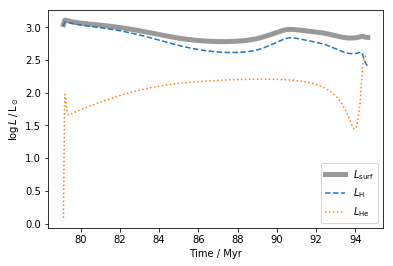

In [10]:
plt.plot(log_5M.history.star_age/1e6, log_5M.history.log_L, label=r'$L_\mathrm{surf}$', alpha=0.4, lw=5, c='k')
plt.plot(log_5M.history.star_age/1e6, log_5M.history.log_LH, label=r'$L_\mathrm{H}$', ls='--')
plt.plot(log_5M.history.star_age/1e6, log_5M.history.log_LHe, label=r'$L_\mathrm{He}$', ls=':')

plt.xlabel('Time / Myr')
plt.ylabel(r'$\log\,L\,/\,\mathrm{L}_\odot$')

plt.legend()

On the MS, the $5\,\mathrm{M}_\odot$ model has a luminosity of $\log\, L\,/\,\mathrm{L}_\odot\approx 2.8$ while the average core-helium-burning luminosity is $\log\, L\,/\,\mathrm{L}_\odot\approx 2.0$. The available fuel on the MS and during core-helium burning are about $1\,\mathrm{M}_\odot$ and $0.2\,\mathrm{M}_\odot$, respectively. This implies that the ratio of the MS and core-helium-burning lifetime is
\begin{align}
\frac{\tau_\mathrm{H}}{\tau_\mathrm{He}} = \frac{M_\mathrm{H}}{M_\mathrm{He}} \frac{L_\mathrm{He}}{L_\mathrm{H}} \approx 0.8.
\end{align}
This is obviously not correct because we have $\tau_\mathrm{H}/\tau_\mathrm{He}\approx 5$. What is missing?

#### Problem 4:
1. Why is the core-helium-burning lifetime of all stars $\lesssim 2\,\mathrm{M}_\odot$ essentially the same? *Hint:* Recall the core-mass-luminosity relation.
2. Above, we pointed out an apparent paradox according to which the core-hydrogen and core-helium burning last about the same time while they do not. What is missing? *Hint:* Think about the energy release of hydrogen and helium burning.

#### Student-report part 1:
Plot the evolutionary track of the $1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$ models up to core helium exhaustion in the HR diagram and the central density-temperature plane. You have to combine the outputs of several simulations and you can use the plotting routines from the shell-hydrogen burning lab.

Text(0.5,1,'Evolutionary track 1 $\\mathrm{M}_\\odot$ ')

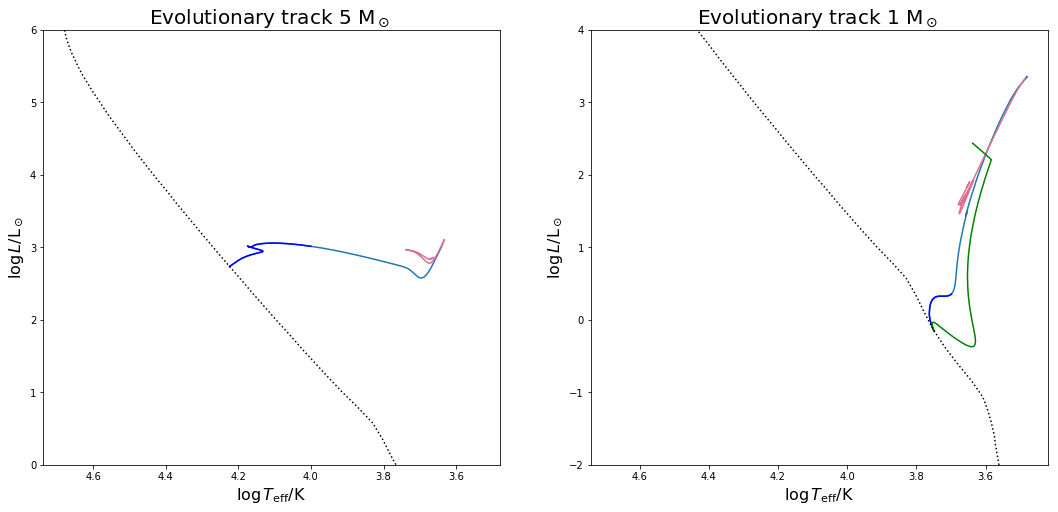

In [24]:
# Your solution here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

logL_zams, Teff_zams, Rho_c_zams, T7_c_zams = np.loadtxt('../06.zero-age_main-sequence/zams-properties.txt', usecols=(1,4,5,6), unpack=True)

log_5M_he_ign = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition')
log_5M_he_burn = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_core-helium-burning/LOGS_5M_core_he_burning')
log_5M_ms = mr.MesaLogDir('../mesa-models/5M/LOGS_5M_ms')


# overview
ax1.plot(log_5M_he_ign.history.log_Teff, log_5M_prev.history.log_L)
ax1.plot(log_5M_he_burn.history.log_Teff, log_5M_he_burn.history.log_L,c='palevioletred')
ax1.plot(log_5M_ms.history.log_Teff,log_5M_ms.history.log_L,c='blue')
ax1.plot(np.log10(Teff_zams),logL_zams,'k:')

ax1.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$',fontsize=16)
ax1.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$',fontsize=16)
ax1.set_title(r'Evolutionary track 5 $\mathrm{M}_\odot$ ',fontsize=20)
ax1.invert_xaxis()
ax1.set_ylim(0,6)


log_1M_prems = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/LOGS_1M_pre_ms')
log_1M_he_ign = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition')
log_1M_he_burn = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning')
log_1M_ms = mr.MesaLogDir('../mesa-models/1M/LOGS_1M_ms')


ax2.plot(log_1M_he_ign.history.log_Teff, log_1M_he_ign.history.log_L)
ax2.plot(log_1M_he_burn.history.log_Teff, log_1M_he_burn.history.log_L,c='palevioletred')
ax2.plot(log_1M_ms.history.log_Teff,log_1M_ms.history.log_L,c='blue')
ax2.plot(log_1M_prems.history.log_Teff,log_1M_prems.history.log_L,c='green')
ax2.plot(np.log10(Teff_zams),logL_zams,'k:')
ax2.invert_xaxis()
ax2.set_ylim(-2,4)
#ax2.set_xlim(4.2,3.8)

ax2.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$',fontsize=16)
ax2.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$',fontsize=16)
ax2.set_title(r'Evolutionary track 1 $\mathrm{M}_\odot$ ',fontsize=20)



Text(0.5,1,'central density-temperature  1 $\\mathrm{M}_\\odot$ ')

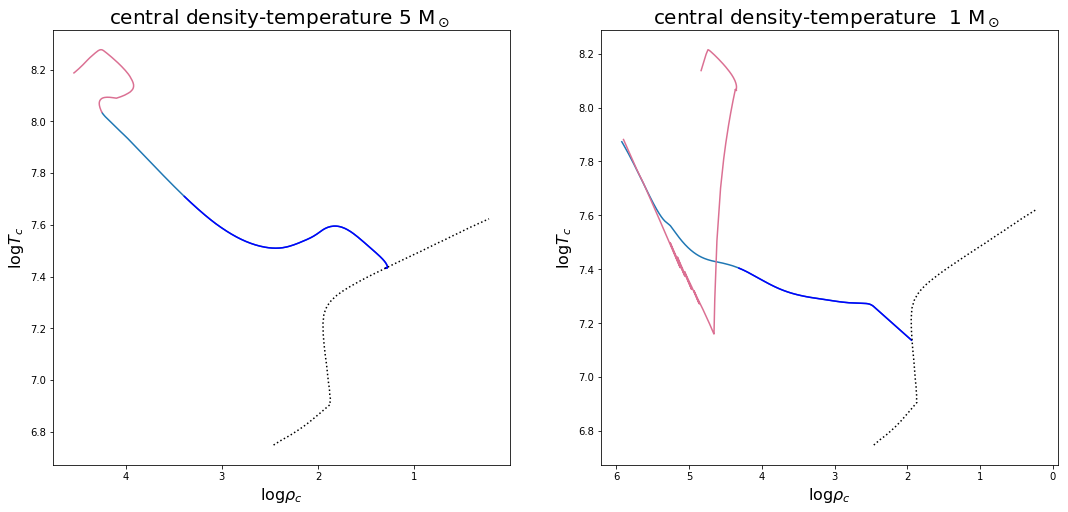

In [31]:
# Your solution here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
log_T_c_zams = np.log10(T7_c_zams) + 7.0
# overview
ax1.plot(log_5M_he_ign.history.log_center_Rho, log_5M_prev.history.log_center_T)
ax1.plot(log_5M_he_burn.history.log_center_Rho, log_5M_he_burn.history.log_center_T,c='palevioletred')
ax1.plot(log_5M_ms.history.log_center_Rho,log_5M_ms.history.log_center_T,c='blue')
ax1.plot(np.log10(Rho_c_zams),log_T_c_zams,'k:')

ax1.set_xlabel(r'$\log \rho_c$',fontsize=16)
ax1.set_ylabel(r'$\log T_c$',fontsize=16)
ax1.set_title(r'central density-temperature 5 $\mathrm{M}_\odot$ ',fontsize=20)
ax1.invert_xaxis()

ax2.plot(log_1M_he_ign.history.log_center_Rho, log_1M_he_ign.history.log_center_T)
ax2.plot(log_1M_he_burn.history.log_center_Rho, log_1M_he_burn.history.log_center_T,c='palevioletred')
ax2.plot(log_1M_ms.history.log_center_Rho,log_1M_ms.history.log_center_T,c='blue')
ax2.plot(np.log10(Rho_c_zams),log_T_c_zams,'k:')
ax2.invert_xaxis()

ax2.set_xlabel(r'$\log \rho_c$',fontsize=16)
ax2.set_ylabel(r'$\log T_c$',fontsize=16)
ax2.set_title(r'central density-temperature  1 $\mathrm{M}_\odot$ ',fontsize=20)



#### Student-report part 2:
Convince yourself that neutrino losses in the core have lead to a cooler temperature in the innermost regions and a maximum temperature further out where the helium flash then occurs. To this end, plot the temperature profile of the very first model in the sequence (model number 3602). At which mass coordinate is the maximum temperature located and how much larger is it compared to the central temperature?

Text(0.5,1,'Temperature Profile')

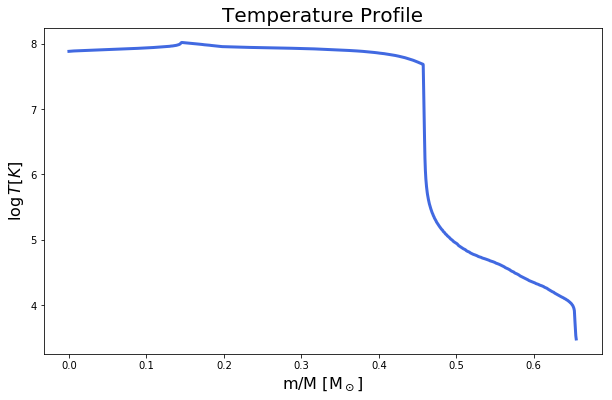

In [41]:
# Your solution here
plt.figure(figsize=(10,6))
plt.plot(log_1M.profile_data(3602).mass,log_1M.profile_data(3602).logT,lw=3,c='royalblue')
plt.xlabel(r'm/M [$\mathrm{M}_\odot$]',fontsize=16)
plt.ylabel(r'$\log\,T[K]$',fontsize=16)
plt.title('Temperature Profile',fontsize=20)

In [13]:
print('Max value for temperature:',np.amax(log_1M.profile_data(3602).logT))
print ('Central temperature:',log_1M.profile_data(3602).logT[-1])

Max value for temperature: 8.017170618140693
Central temperature: 7.881415515907633
